### Основы Python и пакет NumPy
---


In [2]:
import numpy as np
import random
import scipy.stats as sps

### Задача 1
В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [2]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((100,100))
b = np.random.sample((100,100))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
# тут можно писать код 
print(np.ndim(a))
print(np.ndim(b))

print(np.shape(a))
print(np.shape(b))
# ========
print(a)
print(b)

2
2
(100, 100)
(100, 100)
[[0.90772131 0.02204873 0.20177937 ... 0.05711945 0.17372346 0.20917076]
 [0.67193866 0.17810387 0.21932341 ... 0.44872454 0.22402309 0.13277063]
 [0.02918268 0.01903376 0.35806373 ... 0.06989753 0.63974723 0.61721256]
 ...
 [0.79010871 0.58456996 0.02794948 ... 0.68669777 0.84781693 0.36538851]
 [0.50191187 0.58838671 0.52423941 ... 0.95854344 0.0345573  0.17641041]
 [0.74979217 0.28057369 0.10877181 ... 0.19508788 0.35348736 0.65543575]]
[[0.83995504 0.54779281 0.1109244  ... 0.49796592 0.88612793 0.68887226]
 [0.55421646 0.250244   0.43103904 ... 0.35908068 0.83478583 0.78342807]
 [0.40968223 0.46720962 0.87927357 ... 0.99739982 0.97356994 0.34798324]
 ...
 [0.14117123 0.91518706 0.8113764  ... 0.65153081 0.95659179 0.43714791]
 [0.79711768 0.06501116 0.24310384 ... 0.71276704 0.16739403 0.43591048]
 [0.8100262  0.99033324 0.64096065 ... 0.75612582 0.32372726 0.72246487]]


In [4]:
def np_mult(a, b):
    return a@b

print(np_mult(a, b))

[[27.3220254  26.60595552 27.26805353 ... 23.9329527  27.64754921
  23.14496077]
 [25.31441053 25.27789684 26.70294243 ... 23.51128537 27.24368586
  23.05422805]
 [23.80369141 23.2015648  25.24975129 ... 22.71577557 24.17806736
  20.82800584]
 ...
 [23.85407368 22.51840509 23.56305922 ... 21.67708951 23.62397377
  20.77070532]
 [21.72312962 20.90846772 25.73881323 ... 23.80153914 24.7059663
  20.84399584]
 [23.45706036 21.2121407  21.18220078 ... 20.08737456 24.86501555
  19.2173361 ]]


In [5]:
def mult(a, b):
    if a.shape[1] == b.shape[0]:
        shape = (a.shape[0], b.shape[1])
        res = np.zeros(shape)
        
        for i in range(0, shape[0]):
            for k in range(0, shape[1]):
                for l in range(0, a.shape[1]):
                    res[i, k] = res[i, k] + a[i, l] * b[l, k]
        
        return res
    else:
        raise ValueError('Wrong dimensions')
print(mult(a, b))

[[27.3220254  26.60595552 27.26805353 ... 23.9329527  27.64754921
  23.14496077]
 [25.31441053 25.27789684 26.70294243 ... 23.51128537 27.24368586
  23.05422805]
 [23.80369141 23.2015648  25.24975129 ... 22.71577557 24.17806736
  20.82800584]
 ...
 [23.85407368 22.51840509 23.56305922 ... 21.67708951 23.62397377
  20.77070532]
 [21.72312962 20.90846772 25.73881323 ... 23.80153914 24.7059663
  20.84399584]
 [23.45706036 21.2121407  21.18220078 ... 20.08737456 24.86501555
  19.2173361 ]]


In [6]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

Wall time: 646 ms


array([[27.3220254 , 26.60595552, 27.26805353, ..., 23.9329527 ,
        27.64754921, 23.14496077],
       [25.31441053, 25.27789684, 26.70294243, ..., 23.51128537,
        27.24368586, 23.05422805],
       [23.80369141, 23.2015648 , 25.24975129, ..., 22.71577557,
        24.17806736, 20.82800584],
       ...,
       [23.85407368, 22.51840509, 23.56305922, ..., 21.67708951,
        23.62397377, 20.77070532],
       [21.72312962, 20.90846772, 25.73881323, ..., 23.80153914,
        24.7059663 , 20.84399584],
       [23.45706036, 21.2121407 , 21.18220078, ..., 20.08737456,
        24.86501555, 19.2173361 ]])

In [7]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

Wall time: 15.6 ms


array([[27.3220254 , 26.60595552, 27.26805353, ..., 23.9329527 ,
        27.64754921, 23.14496077],
       [25.31441053, 25.27789684, 26.70294243, ..., 23.51128537,
        27.24368586, 23.05422805],
       [23.80369141, 23.2015648 , 25.24975129, ..., 22.71577557,
        24.17806736, 20.82800584],
       ...,
       [23.85407368, 22.51840509, 23.56305922, ..., 21.67708951,
        23.62397377, 20.77070532],
       [21.72312962, 20.90846772, 25.73881323, ..., 23.80153914,
        24.7059663 , 20.84399584],
       [23.45706036, 21.2121407 , 21.18220078, ..., 20.08737456,
        24.86501555, 19.2173361 ]])

### Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [11]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    sum = np.cumsum(A)
    k = np.arange(1, A.size + 1, 1)
    return sum / k 

In [17]:
# функция без NumPy
def naive_sec_av(A):
    S = [0 for i in range(len(A))]
    sum = 0.0
    for i in range(len(A)):
        sum += A[i]
        S[i] = sum
        S[i] /= (i + 1)
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7) 
%time S1 = sec_av(A)
%time S2 = naive_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 103 ms
Wall time: 7.55 s


0.0

### Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все элементы с четными индексами исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив X с преобразованным X и вывести в обратном порядке. 

In [87]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    Y = X.copy()
    Y[1::2] = a
    Y[::2] **= 3
    tmp = Y[::2]
    tmp = tmp[::-1]
    Y[::2] = tmp
    Y = np.hstack((X, Y))
    return Y[::-1]

In [129]:
# функция, решающая задачу  без NumPy
def naive_transformation(X, a = 1):
    Y = [0] * len(X)
    tmp = []
    for i in range(0, len(Y)):
        if i % 2 == 0:
            tmp.append(X[i] ** 3)
        else:
            Y[i] = a
    tmp = tmp[::-1]
    index = 0
    for i in range(0, len(Y)):
        if i % 2 == 0:
            Y[i] = tmp[index]
            index += 1
    Y *= 2
    for i in range(0, len(X)):
        Y[i] = X[i]
    return Y[::-1]

In [130]:
#X = sps.uniform.rvs(size=10 ** 7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер

X = np.array([2, 3, 4, 2, 5, 4.5])
%time S1 = transformation(X)
%time S2 = naive_transformation(X)
print(S1)
print(S2)
# проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 0 ns
Wall time: 0 ns
[  1.    8.    1.   64.    1.  125.    4.5   5.    2.    4.    3.    2. ]
[1, 8.0, 1, 64.0, 1, 125.0, 4.5, 5.0, 2.0, 4.0, 3.0, 2.0]


0.0

Почему методы ***numpy*** оказываются эффективнее?

Использование эффективных алгоритмов и реализация на C/C++

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать.  

### Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [132]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

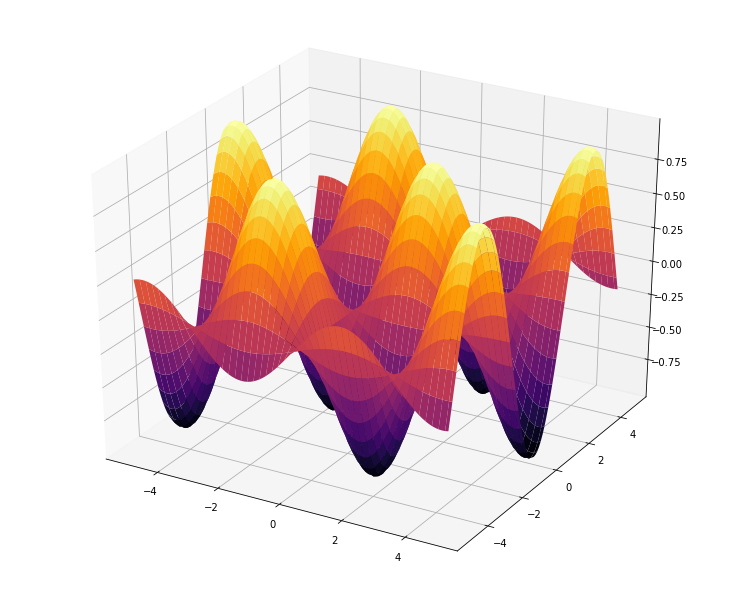

In [139]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)

grid_x, grid_y = np.meshgrid(x, y)

draw_f(grid_x, grid_y)

### Задача 5*

Вам дана картинка. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

In [140]:
from matplotlib import pyplot as plt
%matplotlib inline

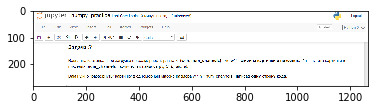

In [142]:
path_to_image = './image.png'
image_array = plt.imread(path_to_image)
plt.imshow(image_array);

In [143]:
flat_image_array = image_array.ravel()

In [146]:
np.shape(flat_image_array)

(1434244,)